<a href="https://colab.research.google.com/github/CaduPortifolio/An-lise/blob/main/mod12_ex02_transforma%C3%A7%C3%B5es_em_X_e_Y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas que serão utilizadas.

import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [2]:
# Importando a base de dados e calculando as variáveis que serão utilizadas.

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
# Realizo a regressão linear do tip_pct e net_bill
# Verifica-se que o R² deu um valor bem baixo, cerca de 9%.
# Isso evidencia que os dados não se ajustam a este modelo.

reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.52e-06
Time:                        14:25:34   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 0.5201973768115943)

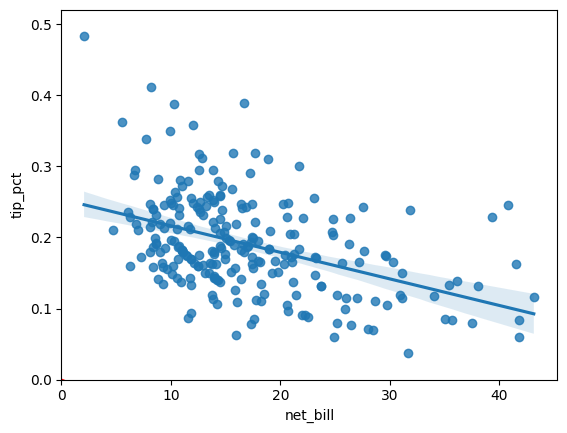

In [5]:
# Plot do gráfico da tip_pct e net_bill.

sns.regplot(y = 'tip_pct', x = 'net_bill', data=tips[tips['tip_pct']<.5])

x= np.linspace(0, tips['net_bill'].max(), 100)
y = -.006 * x

plt.plot(x, y, '-r', label='linha dos 10%')

plt.xlim(left=0)
plt.ylim(bottom=0)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.62e-13
Time:                        14:26:03   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

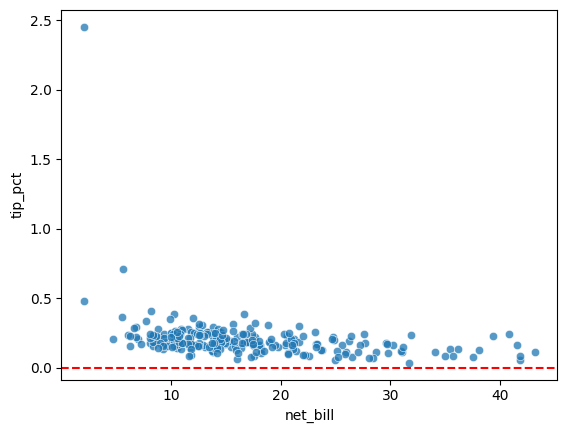

In [6]:
# Aqui realizo o ajuste dos dados para função tip_pct em função do log de net_bill.
# Para isso é preciso usar a biblioteca do numpy.

reg = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

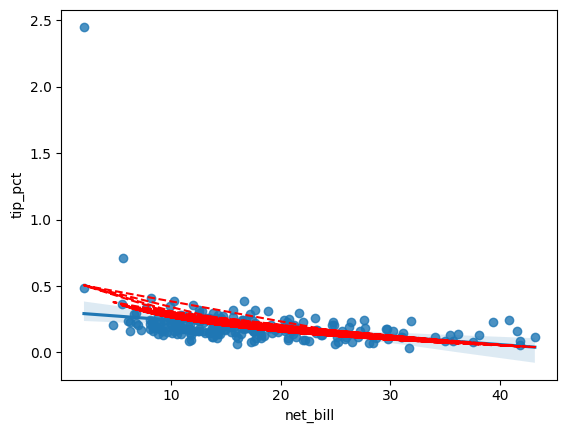

In [7]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.06e-09
Time:                        14:27:16   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

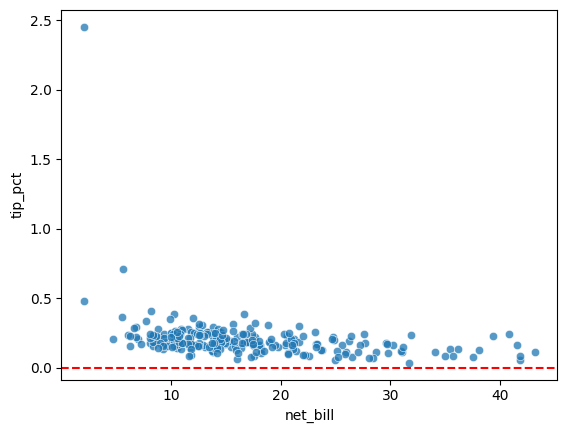

In [8]:
# Ajuste do modelo de tip_pct em função de um polinômio de segundo grau para o net_bill.
# Para ajustar o modelo para um polinômio do segundo grau utiliza-se novamente o numpy

reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data=tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           8.27e-16
Time:                        14:27:55   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

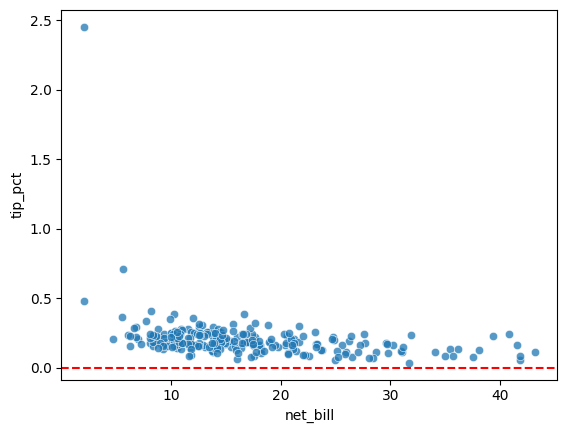

In [9]:
# Aqui o ajuste do modelo do log de tip_pct em função de net_bill.
# Neste caso estamos utilizando o log na variável resposta.
# Novamente usando o numpy para calcular o log da variável.

reg = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

In [10]:
# Como utilizamos o log na variável resposta previsamos realizar uma operação antes de usar o reg.fittedvalues.
# Precisamos calcular o exponencial do reg.fittedvalues, pois ela é o logaritmo da reg.
# Por fim armazenamos esses dados em uma variável no banco de dados.

tips['pred_tip_pct'] = np.exp(reg.fittedvalues)

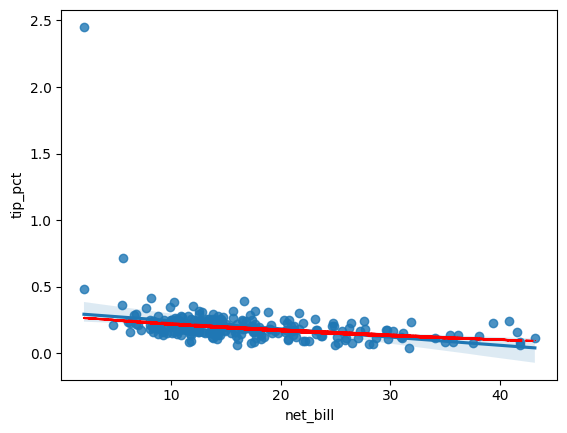

In [11]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], tips['pred_tip_pct'], 'r,--')

In [12]:
# Para calcular o R² usamos a correlação entre o valor predito (reg.fittedvalues) e a variável resposta (tip_pct).
# O valor da correlação é R, então precisamos elevalo ao quadrado para obtermos R².

tips['pred'] = reg.fittedvalues

r = tips[['pred', 'tip_pct']].corr().iloc[0,1]

In [13]:
r**2

0.09129084920662965

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.20e-20
Time:                        14:29:53   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

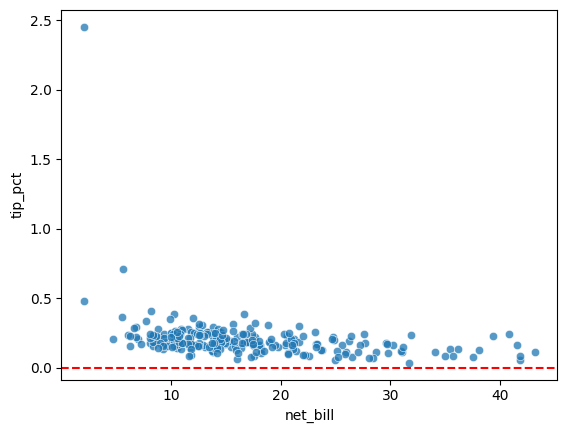

In [14]:
# Aqui realizamos o log de ambas as variáves, resposta e explicativa.
# Assim como realizado anteriormente e preciso que utilizar o valor para o exponencial da variável resposta.

reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

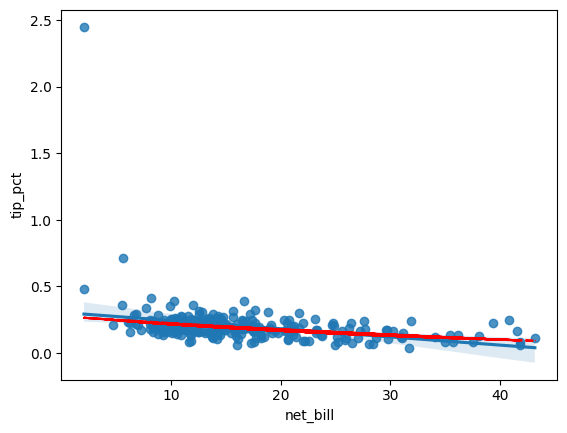

In [15]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], tips['pred_tip_pct'], 'r,--')

###  6. qual modelo resultou no melhor ajuste?

A seguir é apresentada uma tabela comparativa dos R² para cada modelo.

| Modelo                                  | R²    |
|-----------------------------------------|-------|
| tip_pct ~ net_bill                     | 0,091 |
| tip_pct ~ np.log(net_bill)             | 0,202 |
| tip_pct ~ net_bill + np.power(net_bill, 2) | 0,158 |
| np.log(tip_pct) ~ net_bill             | 0,235 |
| np.log(tip_pct) ~ np.log(net_bill)     | 0,293 |

Observando a tabela, o modelo que resultou no melhor ajuste é o **np.log(tip_pct) ~ np.log(net_bill)**, com um valor de \( R^2 \) de **0,293**. Esse valor indica que esse modelo explica aproximadamente 29,3% da variação na variável resposta, o que é o melhor resultado entre os modelos apresentados.